In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

15220736/15296311 [============================>.] - ETA: 0s

Using TensorFlow backend.


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Let's build the simplest possible autoencoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3695 - val_loss: 0.2724
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2648 - val_loss: 0.2539
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2433 - val_loss: 0.2308
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2232 - val_loss: 0.2138
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2087 - val_loss: 0.2014
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1979 - val_loss: 0.1921
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1897 - val_loss: 0.1846
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1829 - val_loss: 0.1783
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1768 - val_loss: 0.1726
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1714 - val_loss: 0.1674

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

def plot_all():
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

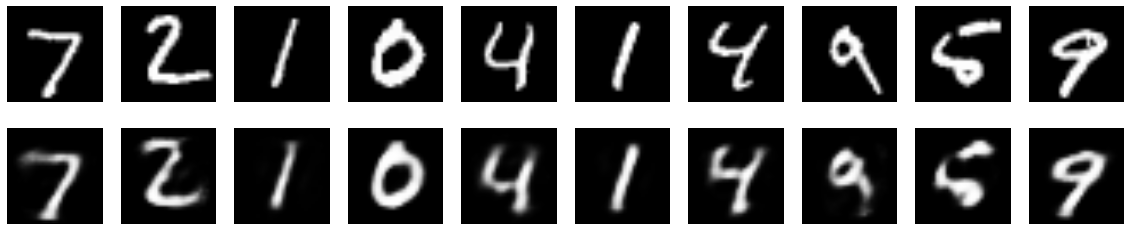

In [12]:
plot_all()

## Deep autoencoder

In [13]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s - loss: 0.3622 - val_loss: 0.2636
Epoch 2/100
60000/60000 [==============================] - 3s - loss: 0.2592 - val_loss: 0.2534
Epoch 3/100
60000/60000 [==============================] - 3s - loss: 0.2442 - val_loss: 0.2334
Epoch 4/100
60000/60000 [==============================] - 3s - loss: 0.2220 - val_loss: 0.2101
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.2044 - val_loss: 0.1969
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.1932 - val_loss: 0.1885
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.1868 - val_loss: 0.1838
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.1817 - val_loss: 0.1794
Epoch 9/100
60000/60000 [==============================] - 3s - loss: 0.1750 - val_loss: 0.1695
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.1687 - val_lo

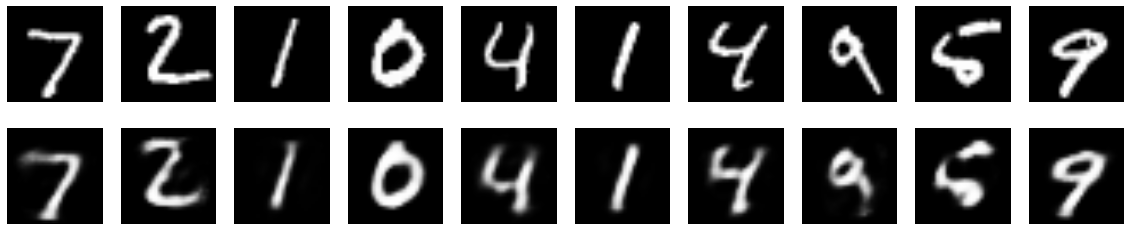

In [15]:
plot_all()

## Convolutional autoencoder

In [26]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(1, 28, 28))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same',dim_ordering ='th')(input_img)
x = MaxPooling2D((2, 2), border_mode='same',dim_ordering ='th')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same',dim_ordering ='th')(x)
x = MaxPooling2D((2, 2), border_mode='same',dim_ordering ='th')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same',dim_ordering ='th')(x)
encoded = MaxPooling2D((2, 2), border_mode='same',dim_ordering ='th')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same',dim_ordering ='th')(encoded)
x = UpSampling2D((2, 2),dim_ordering ='th')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same',dim_ordering ='th')(x)
x = UpSampling2D((2, 2),dim_ordering ='th')(x)
x = Convolution2D(16, 3, 3, activation='relu',dim_ordering ='th')(x)
x = UpSampling2D((2, 2),dim_ordering ='th')(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same',dim_ordering ='th')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [22]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

In [20]:
def plot_conv():
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [27]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 3840/60000 [>.............................] - ETA: 402s - loss: 0.5396

KeyboardInterrupt: 

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
plot_conv()